# **1. Perkenalan Dataset**


Dataset yang saya gunakan diperoleh melalui public repositories Kaggle
1. **Sumber Dataset**:  https://www.kaggle.com/datasets/blastchar/telco-customer-churn
2. **Nama Dataset**: Telco Customer Churn
3. **Deskripsi Singkat**: Dataset ini berisi informasi detail pelanggan dari sebuah perusahaan telekomunikasi. Data ini menunjukkan pelanggan mana saja yang telah berhenti berlangganan (churn), bergabung, atau tetap menggunakan layanan perusahaan. Dataset ini digunakan untuk membangun model Classification guna memprediksi perilaku customer churn.
   


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [16]:
# Load dataset
dataset = "../telco_customer_churn_raw/telco_customer_churn_raw.csv"
df = pd.read_csv(dataset)

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
# Cek Missing Values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [20]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df.duplicated().sum()

np.int64(0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10208\119414485.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


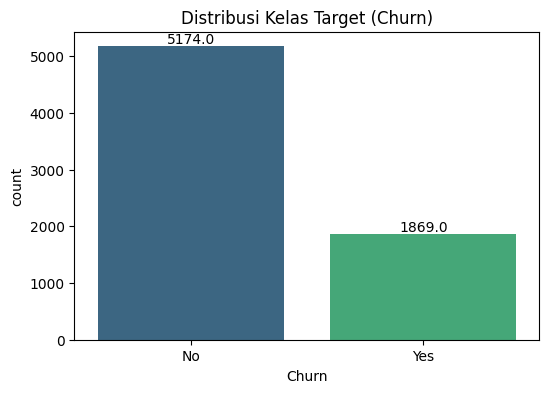

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [22]:
# Visualisasi persentase Churn
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))

plt.title('Distribusi Kelas Target (Churn)')
plt.show()

# Menghitung rasio kelas target
print(df['Churn'].value_counts(normalize=True))

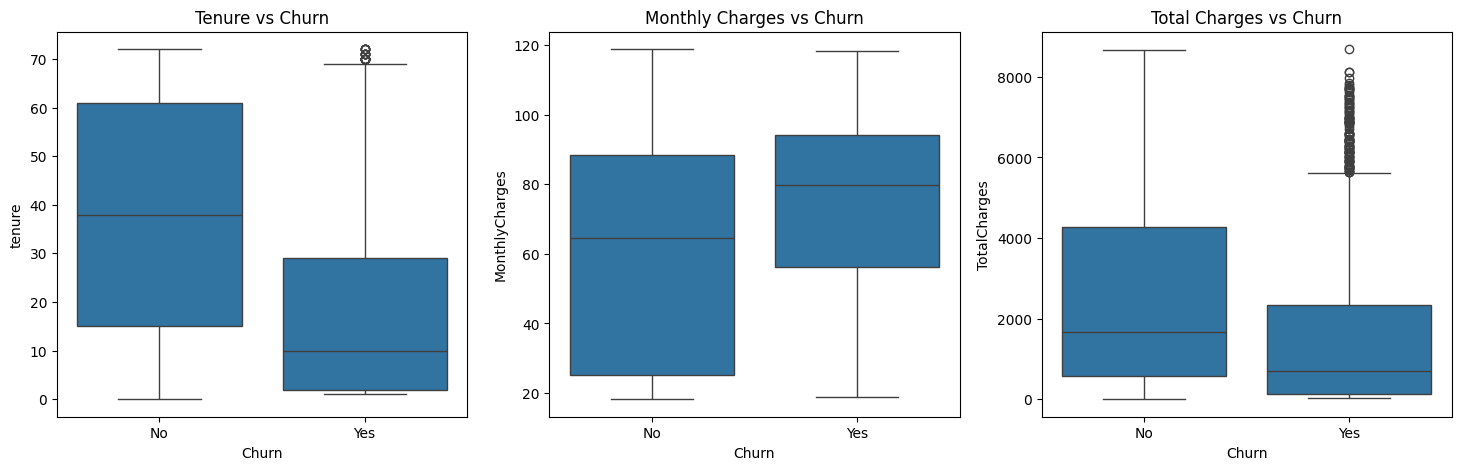

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0])
axes[0].set_title('Tenure vs Churn')

# Plot 2: MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn')

# Plot 3: TotalCharges vs Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2])
axes[2].set_title('Total Charges vs Churn')
plt.show()

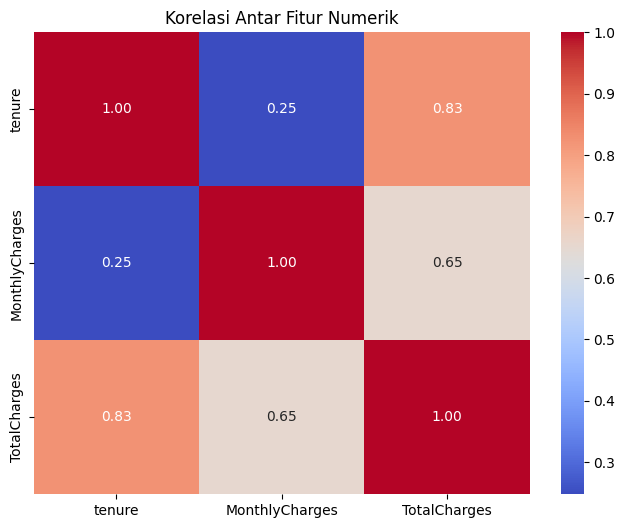

In [10]:
plt.figure(figsize=(8, 6))
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

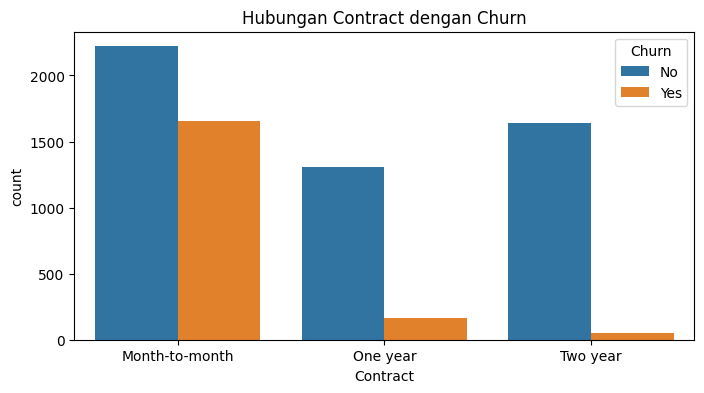

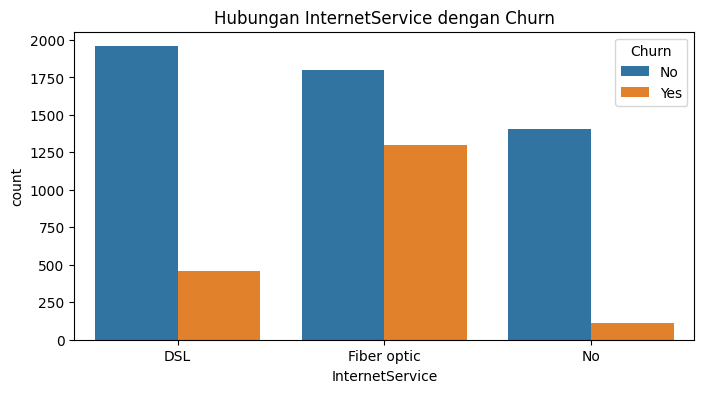

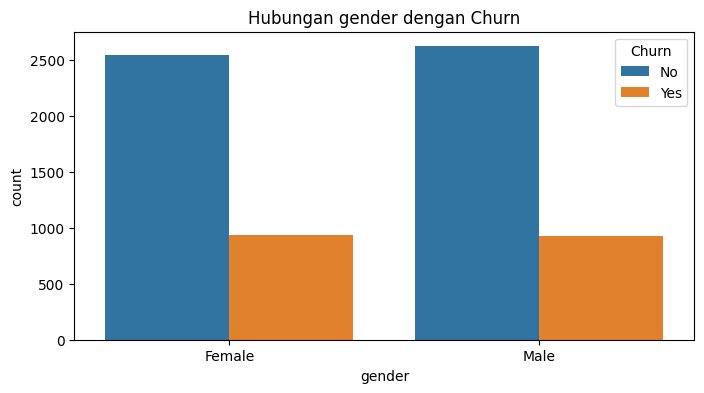

In [9]:
# Plot kolom kategorial
def plot_categorical(feature):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Hubungan {feature} dengan Churn')
    plt.show()

# Cek Contract
plot_categorical('Contract')

# Cek InternetService
plot_categorical('InternetService')

# Cek Gender
plot_categorical('gender')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# Menghapus Kolom yang Tidak Diperlukan
df_clean = df.drop(['customerID'], axis=1)
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Memisahkan kolom kategorikal dan numerik
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Kolom Kategorikal:", cat_cols)
print("Kolom Numerik:", num_cols)

# A. Label Encoding untuk kolom target 'Churn'
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

# B. One-Hot Encoding untuk fitur kategorikal lainnya
df_clean = pd.get_dummies(df_clean, columns=[col for col in cat_cols if col != 'Churn'], drop_first=True)

df_clean.head()

Kolom Kategorikal: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Kolom Numerik: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [12]:
# Split data menjadi Fitur (X) dan Target (y)
X = df_clean.drop('Churn', axis=1) 
y = df_clean['Churn']              

# Bagi 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah Data Training:", X_train.shape[0])
print("Jumlah Data Testing:", X_test.shape[0])

Jumlah Data Training: 5625
Jumlah Data Testing: 1407


In [13]:
# Melakukan Standarisasi untuk fitur numerik
scaler = StandardScaler()

col_names = X_train.columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Kembalikan ke DataFrame
X_train = pd.DataFrame(X_train, columns=col_names)
X_test = pd.DataFrame(X_test, columns=col_names)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

X_train.head()
X_test.head()

Training set shape: X_train=(5625, 30), y_train=(5625,)
Test set shape: X_test=(1407, 30), y_test=(1407,)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2.285245,1.168321,-1.315736,-0.341541,0.986404,1.038981,-0.653684,0.328871,-0.328871,1.182675,...,1.887338,-0.792512,1.887338,-0.801758,-0.518272,1.782119,-1.202795,-0.527645,-0.714758,-0.547427
1,-0.437590,-0.543522,-1.325680,-0.798916,-1.013784,-0.962481,-0.653684,0.328871,-0.328871,1.182675,...,1.887338,-0.792512,1.887338,-0.801758,-0.518272,-0.561130,-1.202795,-0.527645,-0.714758,-0.547427
2,-0.437590,-0.788071,1.244647,-0.404569,0.986404,1.038981,-0.653684,0.328871,-0.328871,1.182675,...,-0.529847,1.261811,-0.529847,1.247260,-0.518272,-0.561130,0.831397,1.895214,-0.714758,-0.547427
3,-0.437590,0.190125,-0.319756,-0.107975,0.986404,1.038981,-0.653684,0.328871,-0.328871,1.182675,...,-0.529847,-0.792512,-0.529847,-0.801758,-0.518272,-0.561130,0.831397,-0.527645,-0.714758,1.826727
4,-0.437590,-1.073378,-1.168245,-0.933316,-1.013784,-0.962481,-0.653684,-3.040707,3.040707,-0.845541,...,-0.529847,-0.792512,-0.529847,-0.801758,-0.518272,-0.561130,-1.202795,-0.527645,-0.714758,-0.547427


In [14]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

train_clean = pd.concat([X_train, y_train], axis=1)
test_clean = pd.concat([X_test, y_test], axis=1)

print("Shape train_clean:", train_clean.shape)
print("Shape test_clean:", test_clean.shape)

output_folder = "telco_customer_churn_preprocessing"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

train_clean.to_csv(f"{output_folder}/train_clean.csv", index=False)
test_clean.to_csv(f"{output_folder}/test_clean.csv", index=False)

print(f"\nSUKSES! Data berhasil diexport ke folder '{output_folder}':")
print(f"{output_folder}/train_clean.csv")
print(f"{output_folder}/test_clean.csv")

Shape train_clean: (5625, 31)
Shape test_clean: (1407, 31)

SUKSES! Data berhasil diexport ke folder 'telco_customer_churn_preprocessing':
telco_customer_churn_preprocessing/train_clean.csv
telco_customer_churn_preprocessing/test_clean.csv
